# Wine Quality Prediction
---

---

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

# EDA

In [3]:
#dftrain = pd.read_csv('/kaggle/input/playground-series-s3e5/train.csv')
#dftest = pd.read_csv('/kaggle/input/playground-series-s3e5/test.csv')
import glob
dftrain = pd.concat(map(pd.read_csv, glob.glob('*.csv')))

In [4]:
dftrain.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.7,0.27,0.26,2.3,0.043,61.0,181.0,0.99394,3.45,0.63,10.6,6
1,6.6,0.56,0.15,10.0,0.037,38.0,157.0,0.99642,3.28,0.52,9.4,5
2,6.6,0.56,0.15,10.0,0.037,38.0,157.0,0.99642,3.28,0.52,9.4,5
3,7.3,0.19,0.27,1.6,0.027,35.0,136.0,0.99248,3.38,0.54,11.0,7
4,6.3,0.20,0.26,1.6,0.027,36.0,141.0,0.99268,3.53,0.56,10.8,6


In [5]:
dftrain.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2444,7.6,0.285,0.32,14.6,0.063,32.0,201.0,0.99800,3.00,0.45,9.2,5
2445,6.6,0.340,0.34,2.6,0.051,40.5,210.0,0.99314,3.15,0.61,10.0,5
2446,6.6,0.320,0.33,2.5,0.052,40.0,210.0,0.99316,3.15,0.60,10.0,5
2447,6.5,0.270,0.26,8.2,0.042,21.0,133.0,0.99612,3.43,0.64,9.8,6
2448,6.6,0.260,0.27,1.5,0.040,19.0,114.0,0.99295,3.36,0.62,10.5,6


In [6]:
dftrain.shape

(4898, 12)

In [7]:
dftrain.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
dftrain.duplicated().sum()

937

In [9]:
dftrain.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4898 entries, 0 to 2448
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 497.5 KB


In [11]:
dftrain.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [12]:
columns = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

# Count Plot

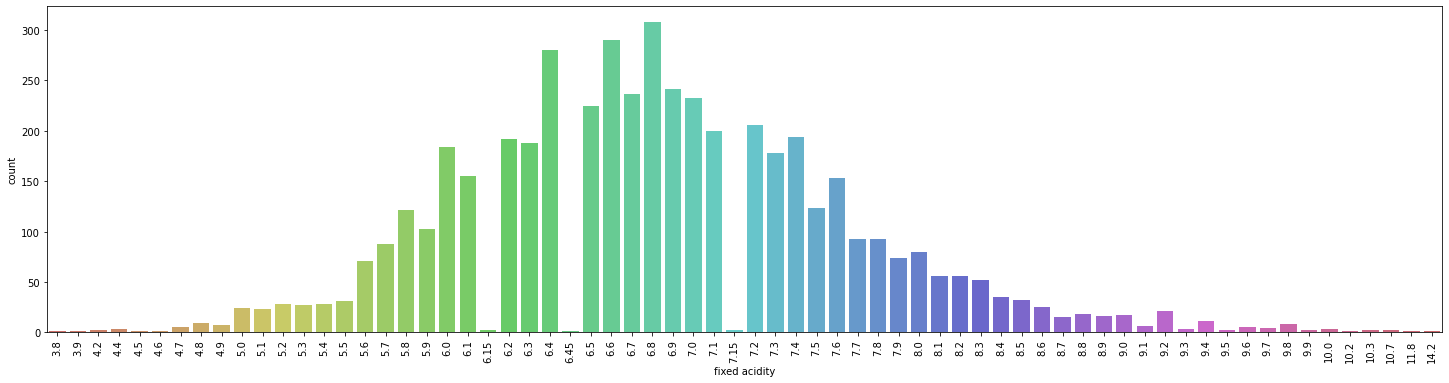

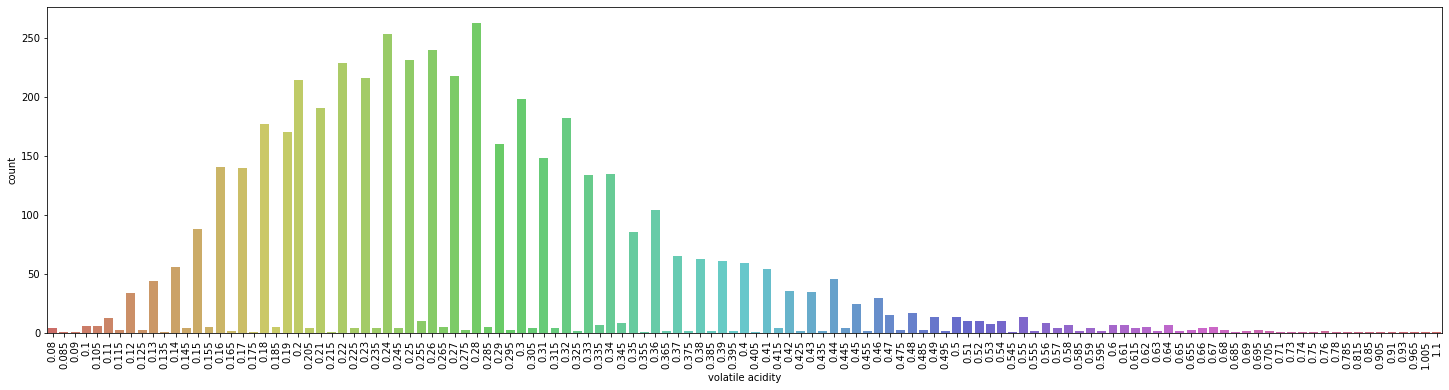

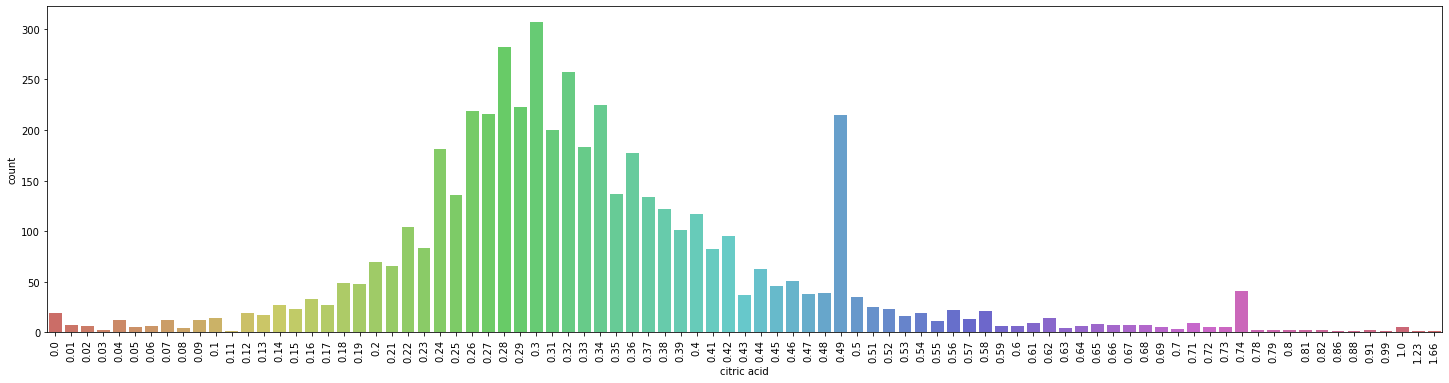

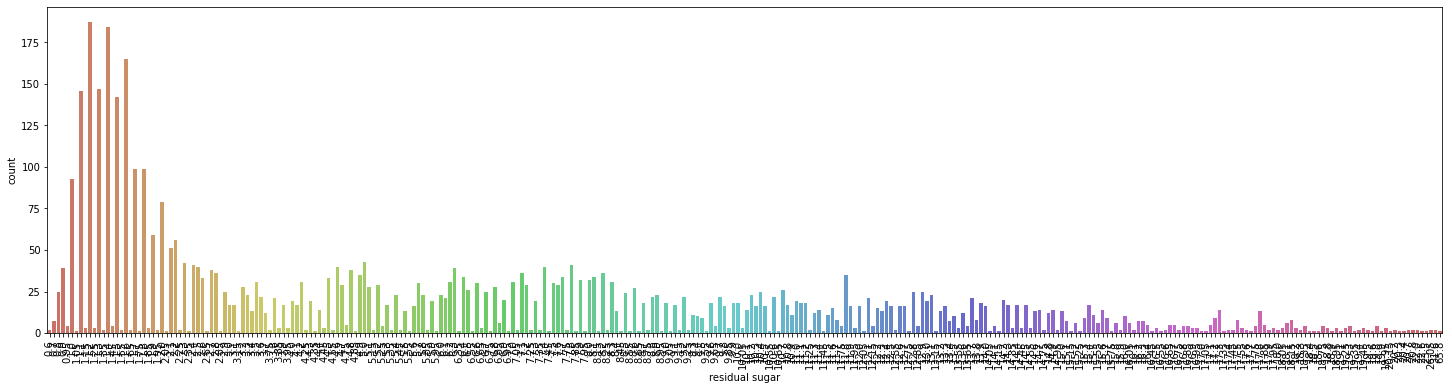

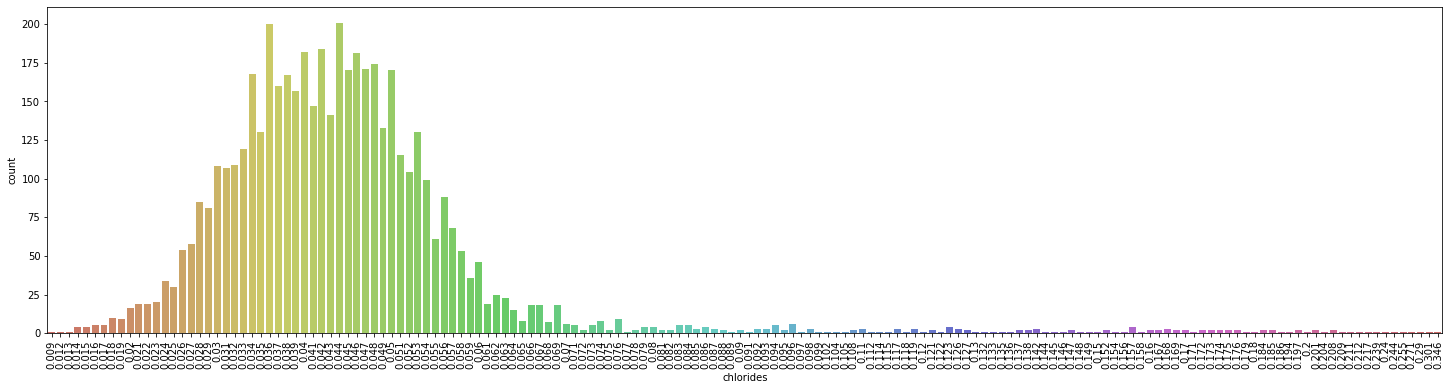

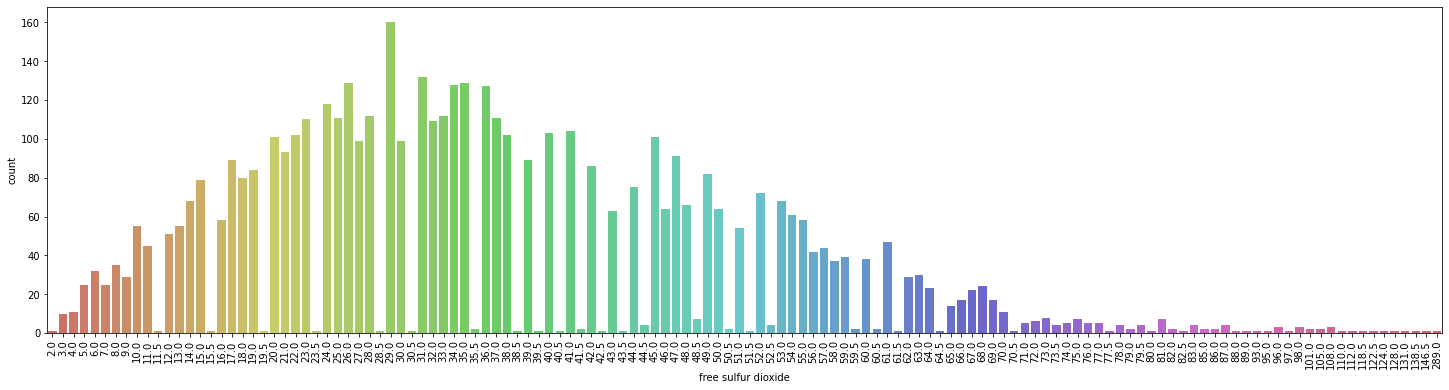

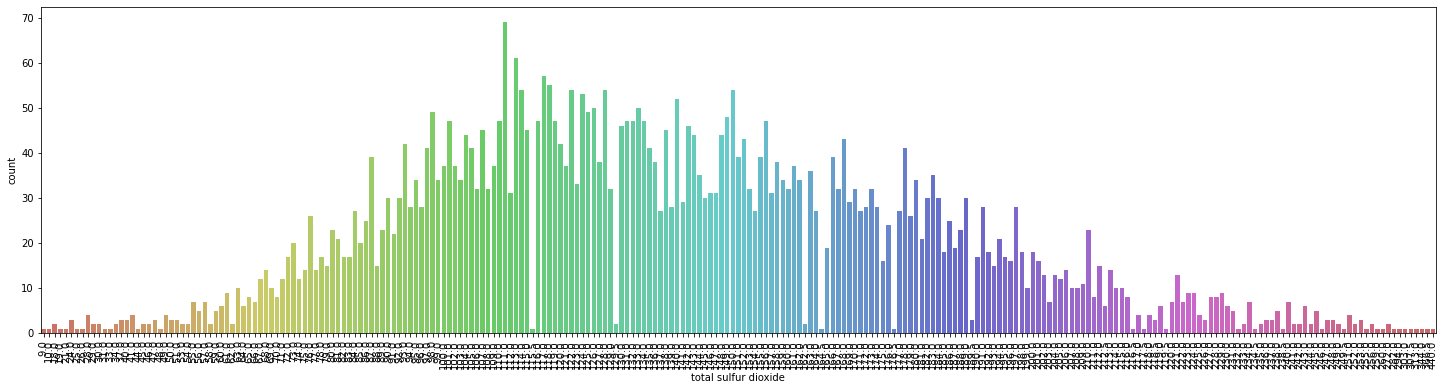

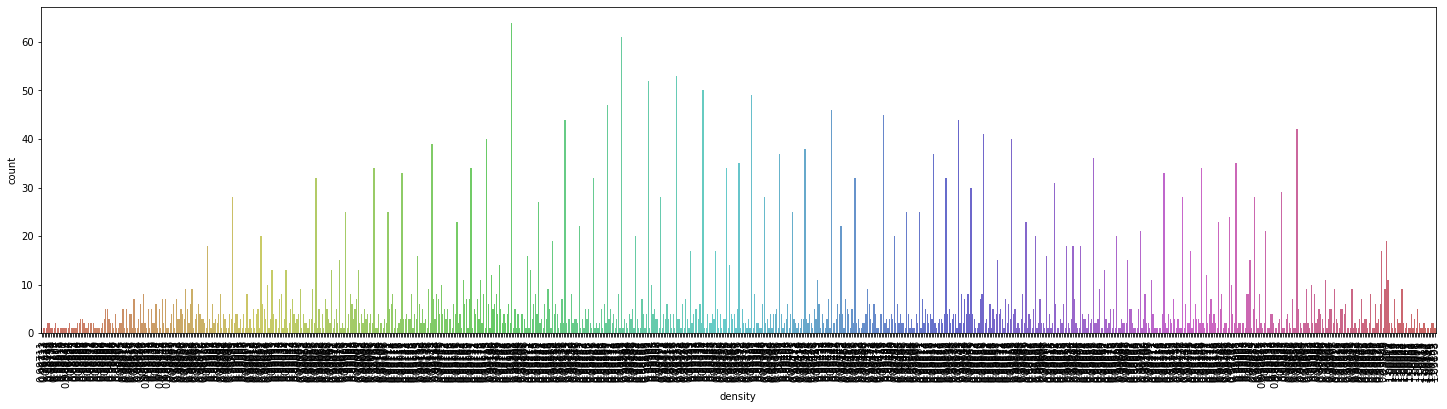

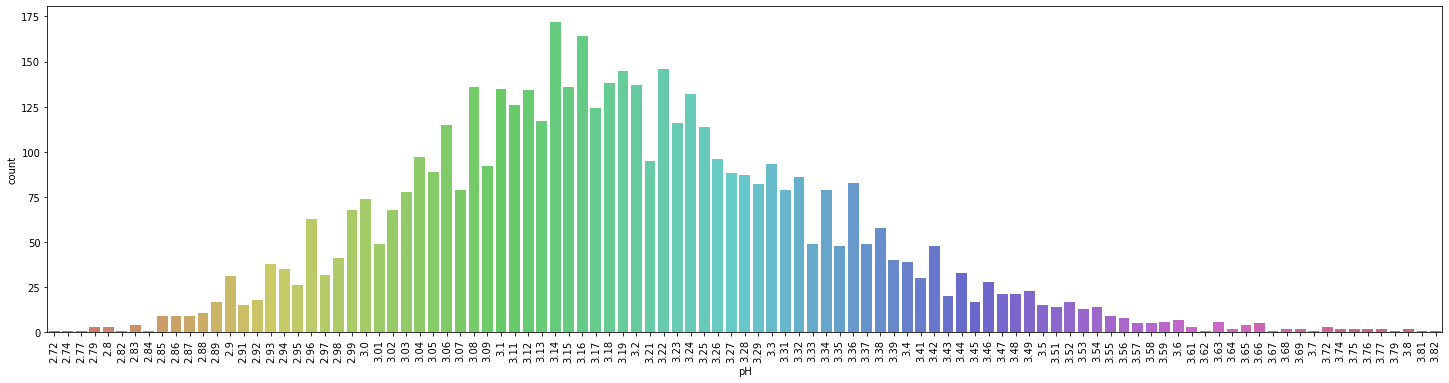

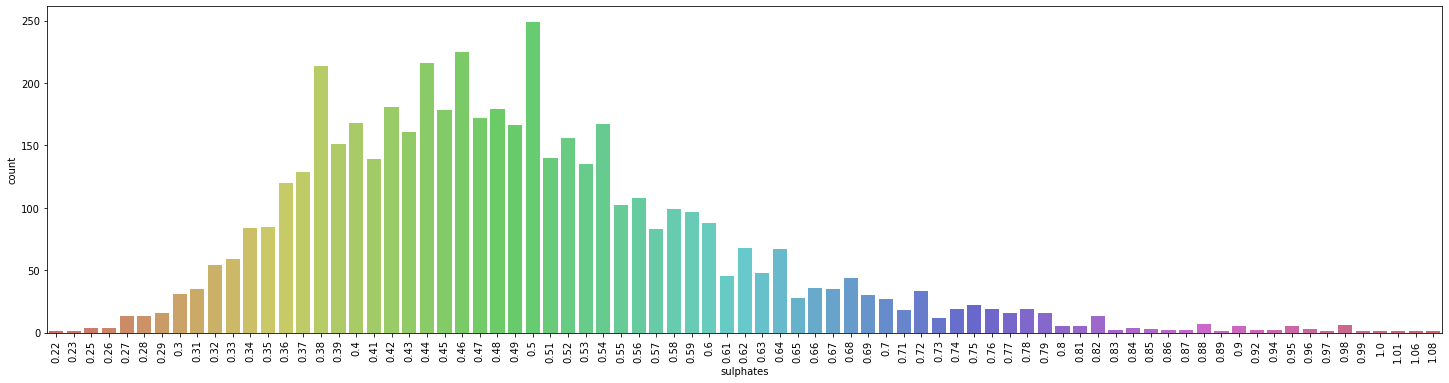

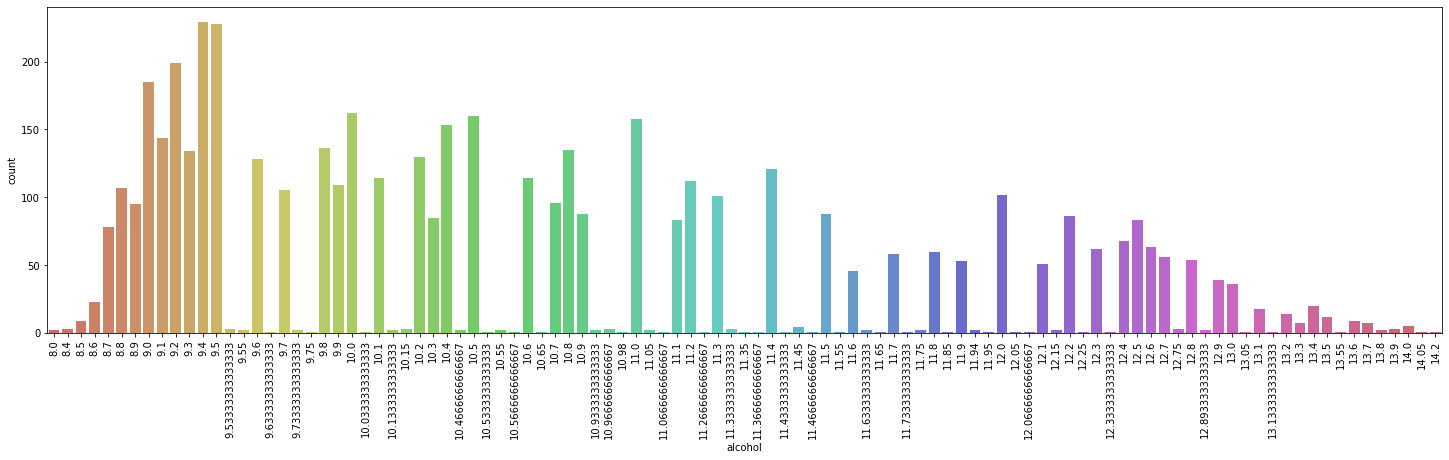

In [13]:
for column in columns:
    plt.figure(figsize = (25,6))
    sns.countplot(x = dftrain[column], data=dftrain, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

# Dist Plot

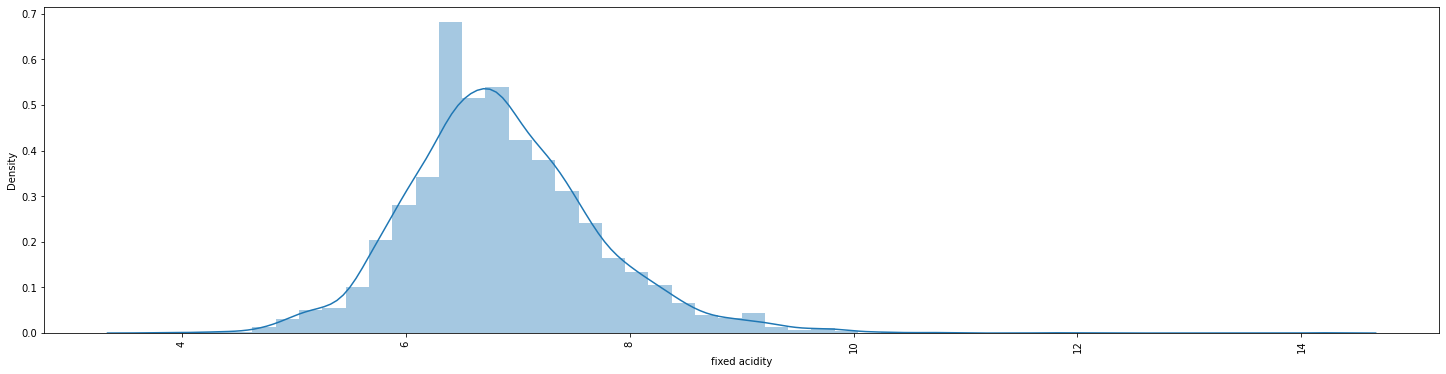

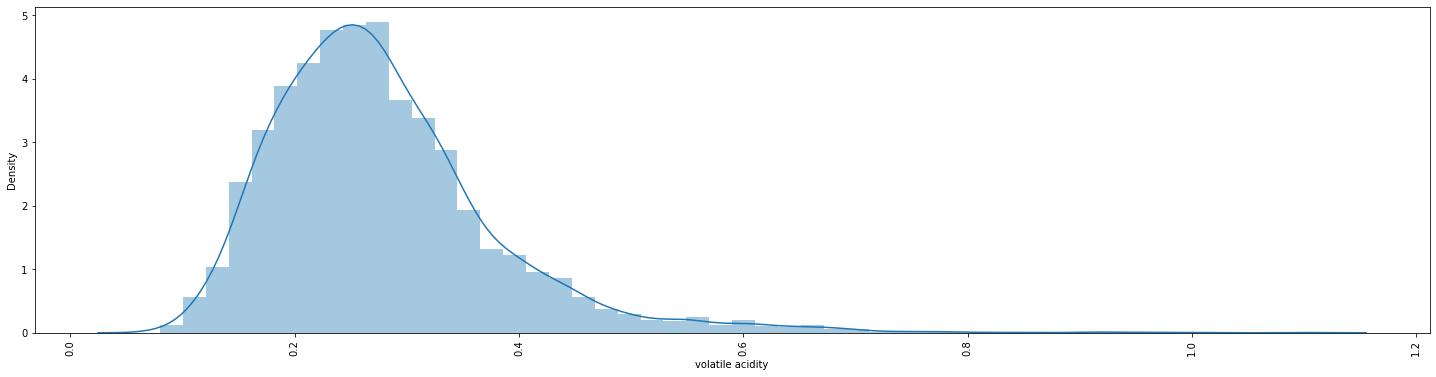

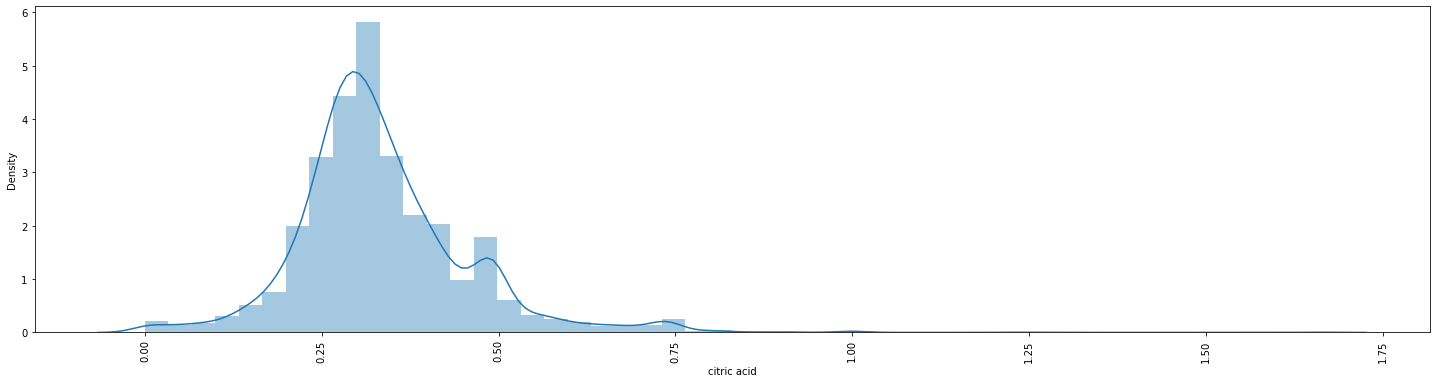

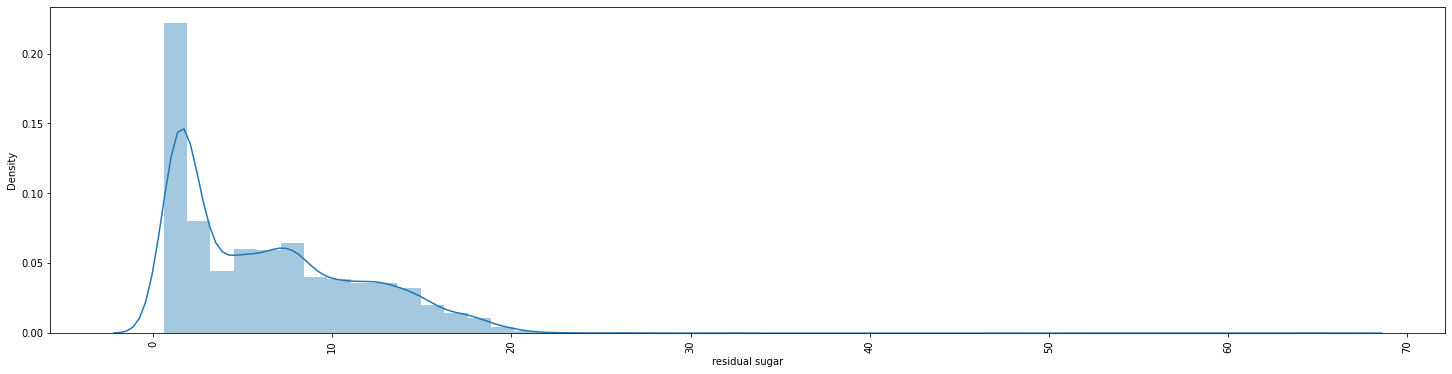

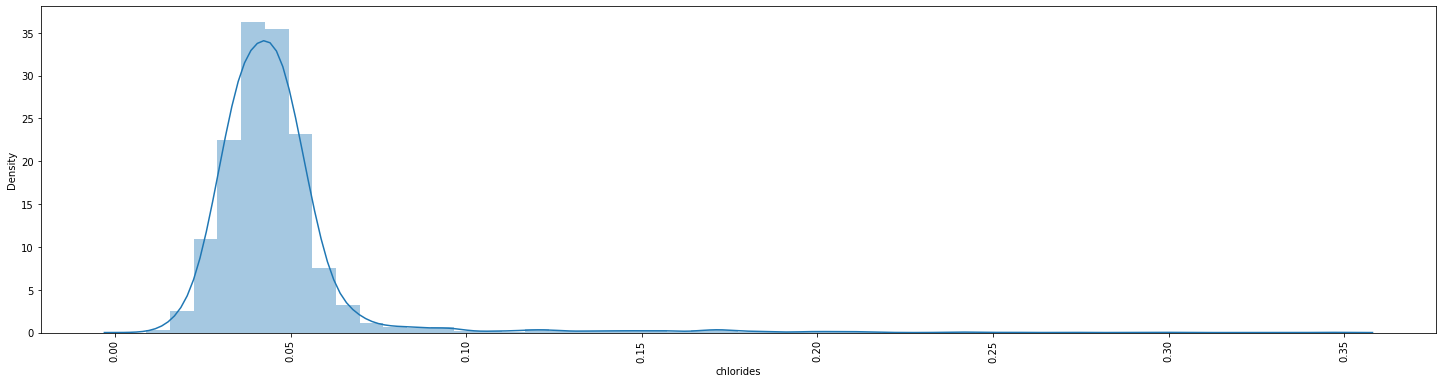

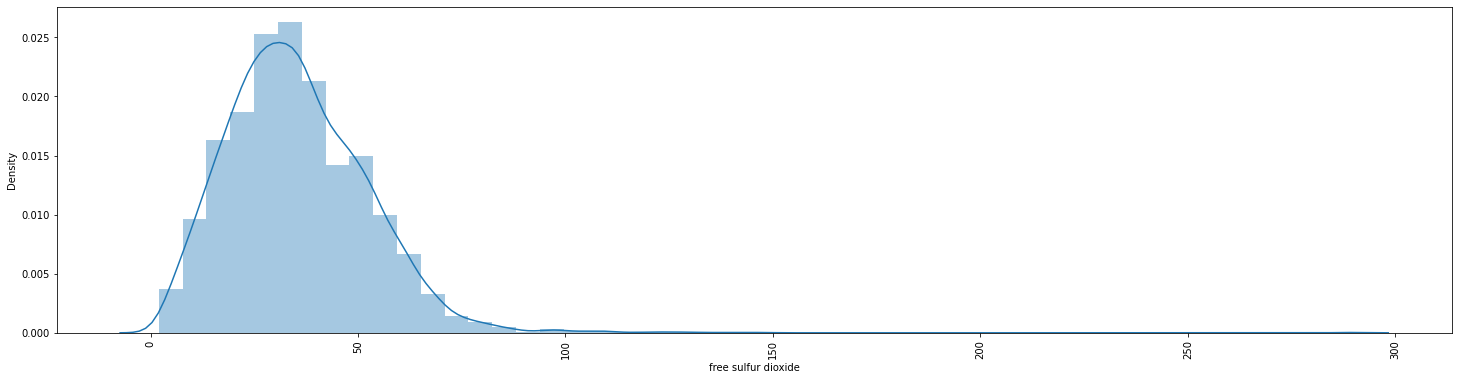

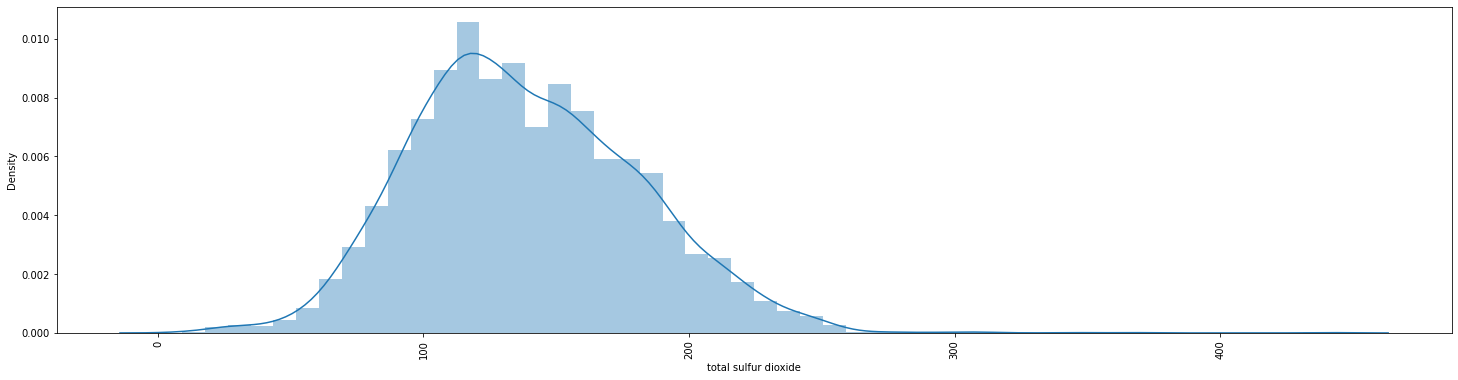

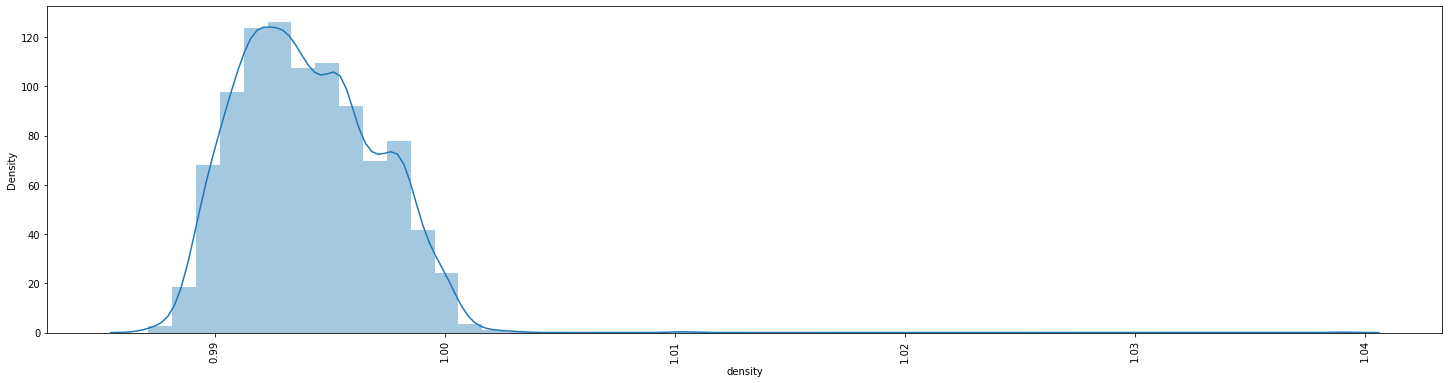

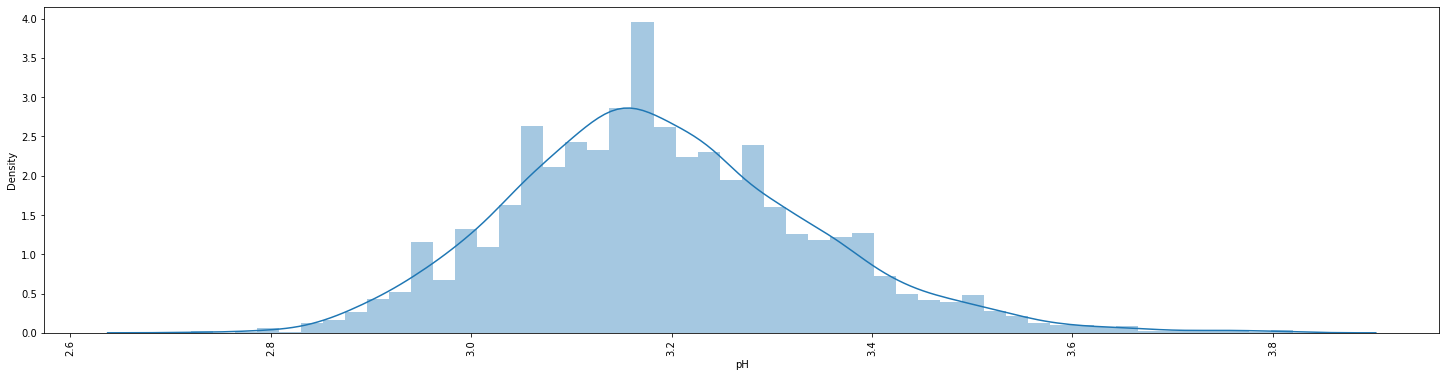

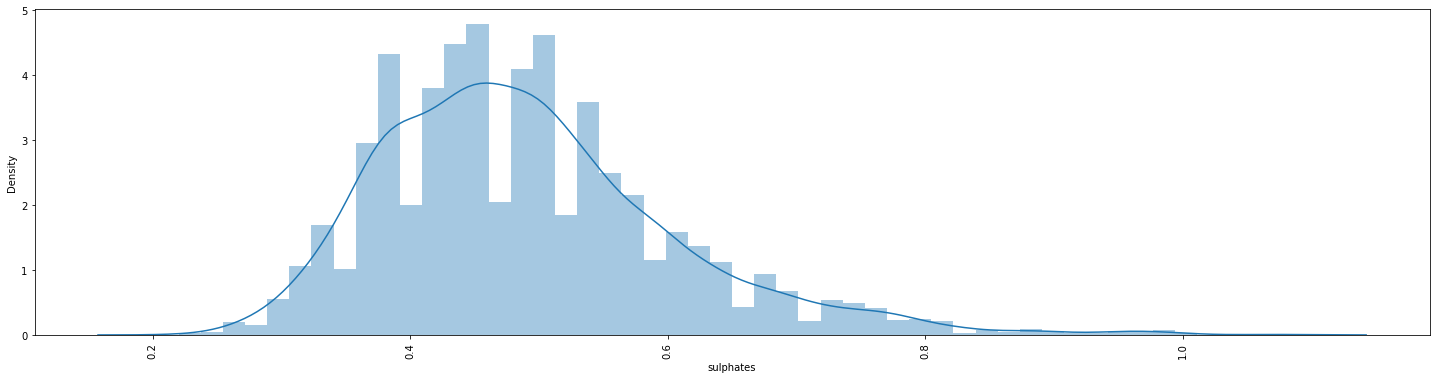

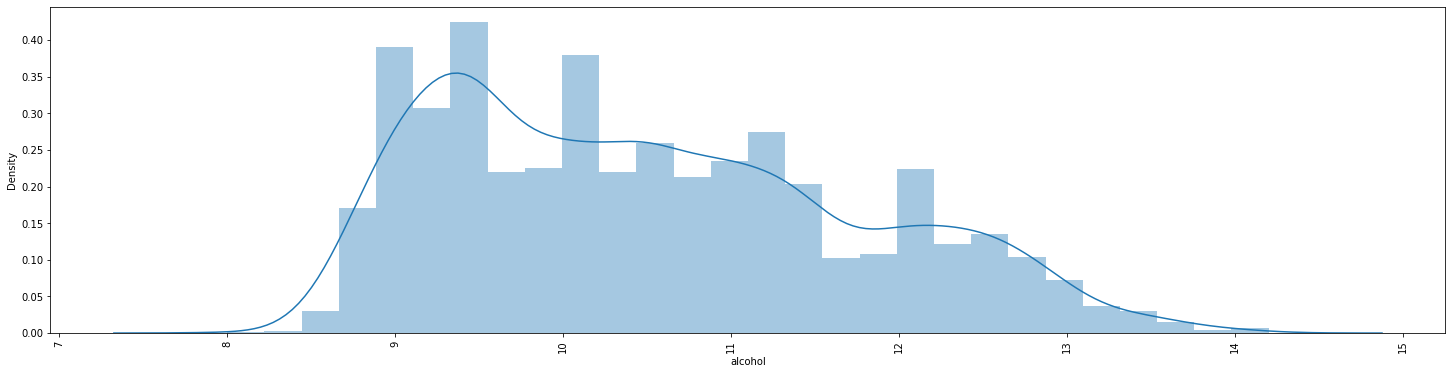

In [14]:
for column in columns:
    plt.figure(figsize = (25,6))
    sns.distplot(dftrain[column])
    plt.xticks(rotation=90)
    plt.show()

# Box Plot

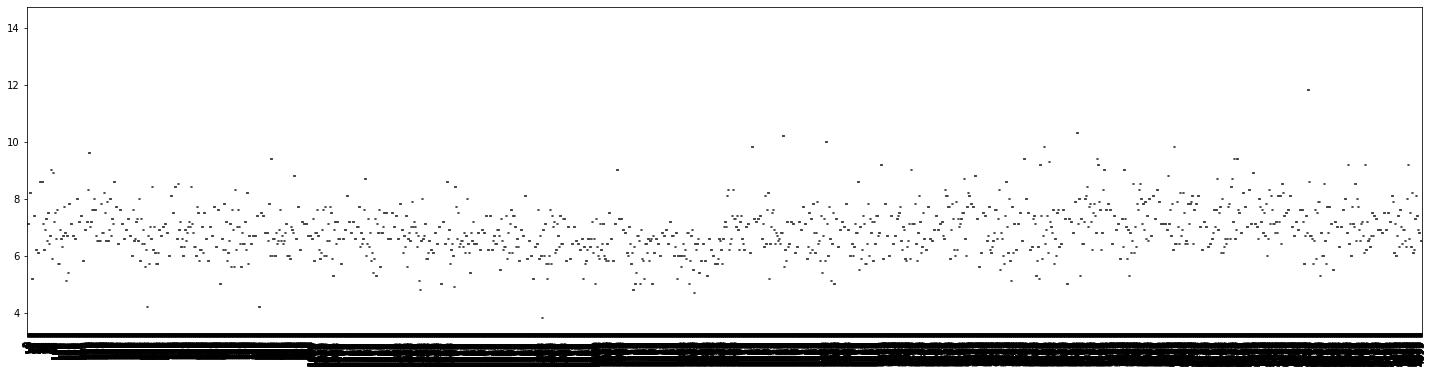

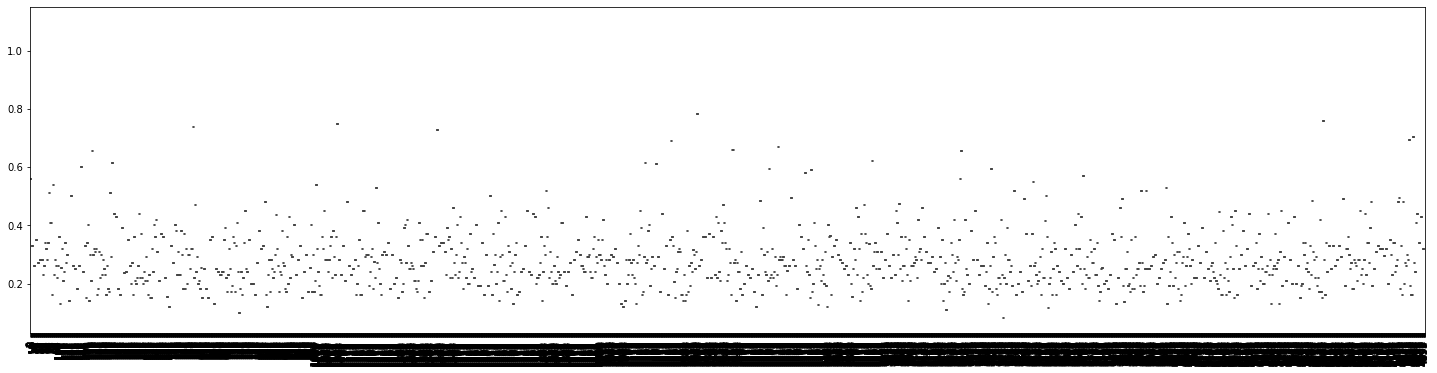

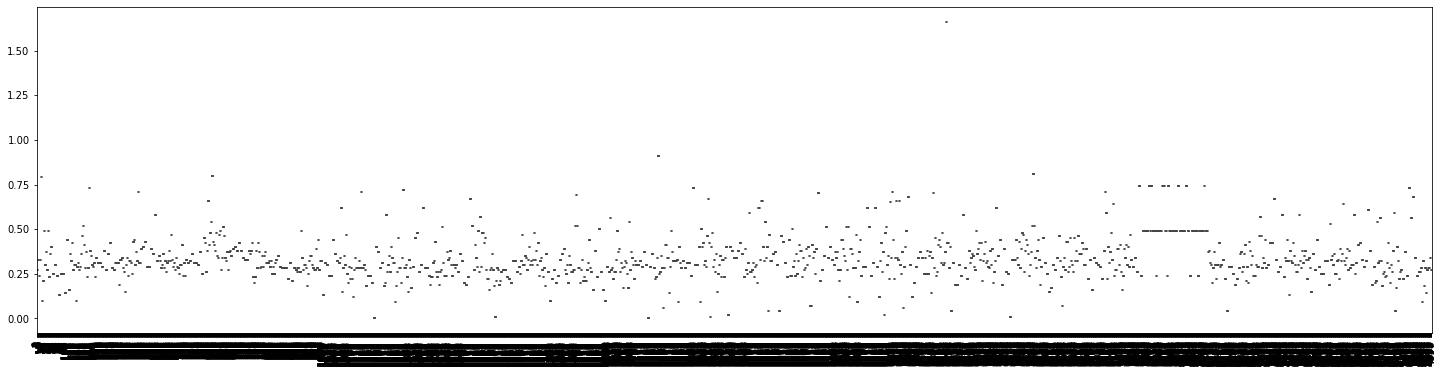

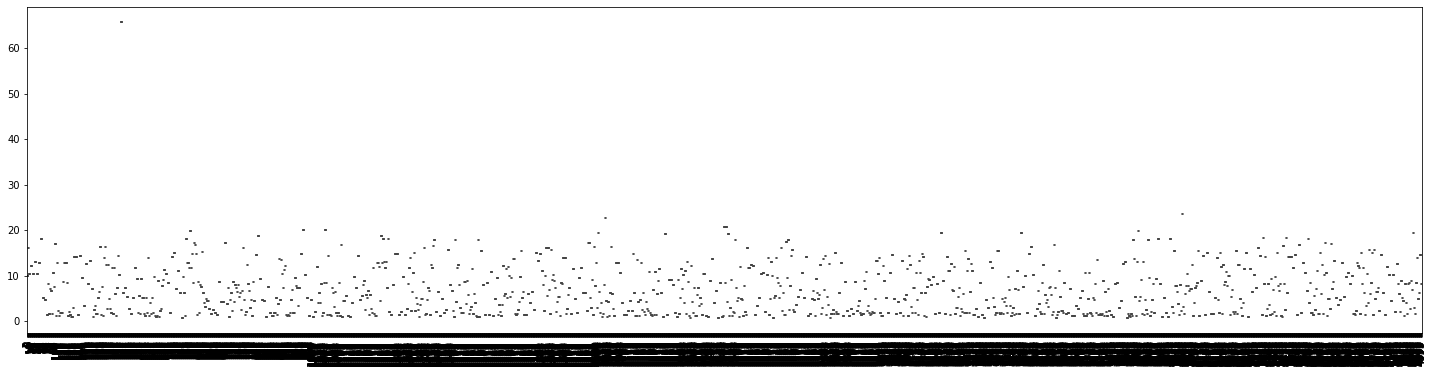

In [ ]:
for column in columns:
    plt.figure(figsize = (25,6))
    sns.boxplot(dftrain[column])
    plt.xticks(rotation=90)
    plt.show()

# Pair Plot

In [ ]:
sns.pairplot(dftrain[dftrain.columns],height = 5 ,kind ='scatter',diag_kind='kde')

# Line Plot

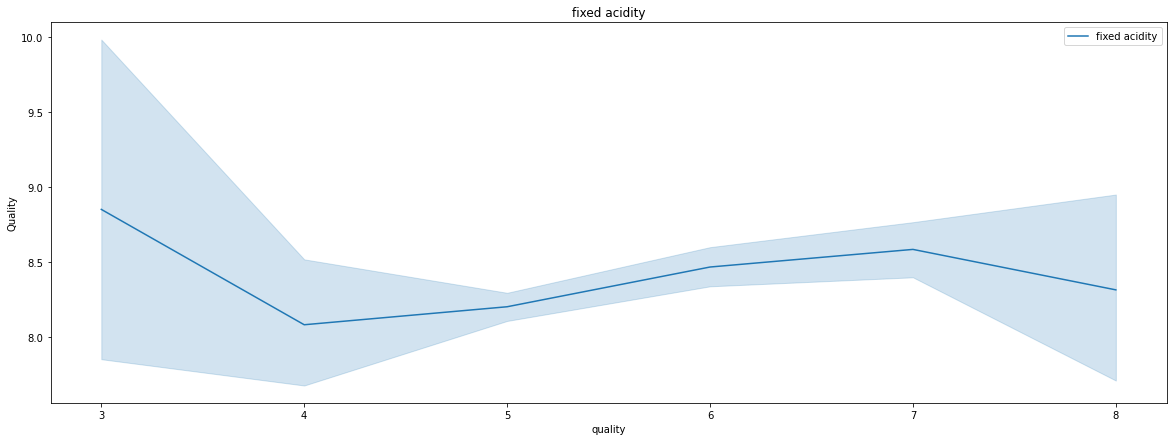

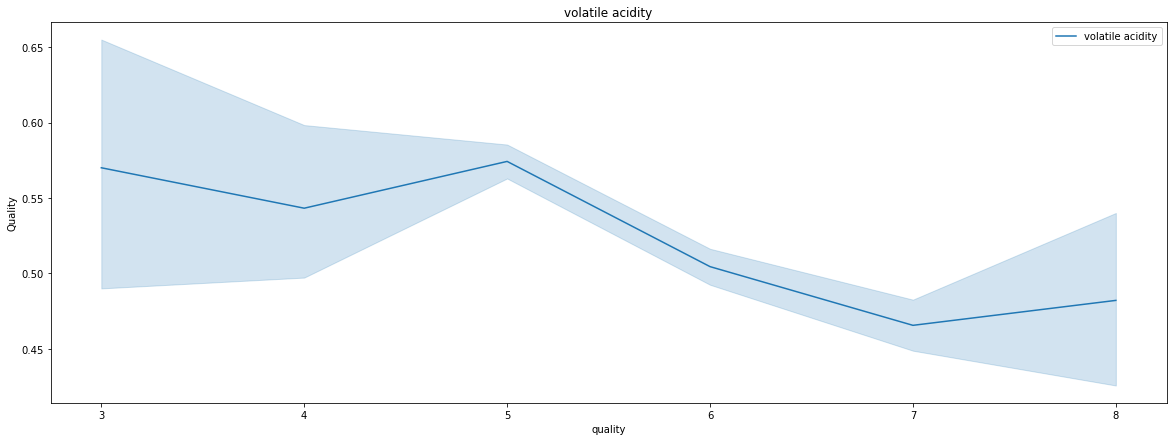

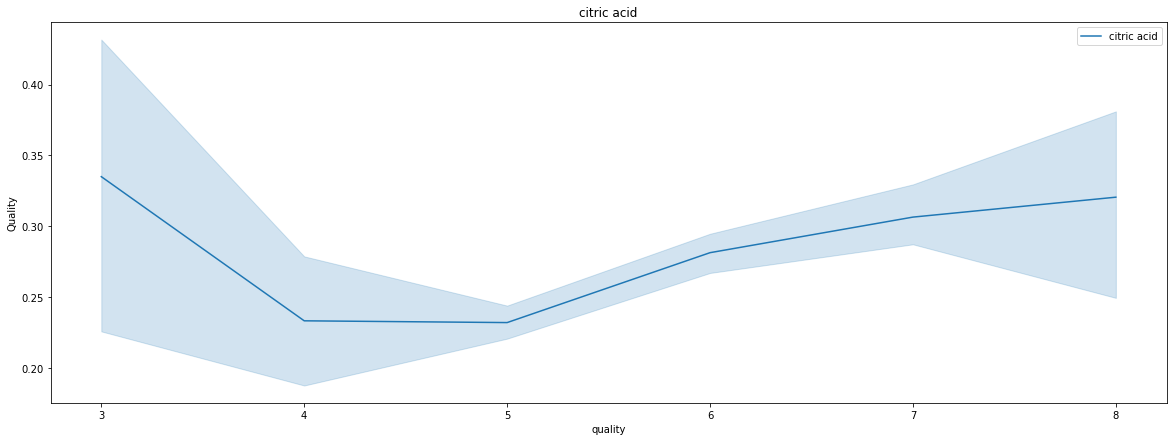

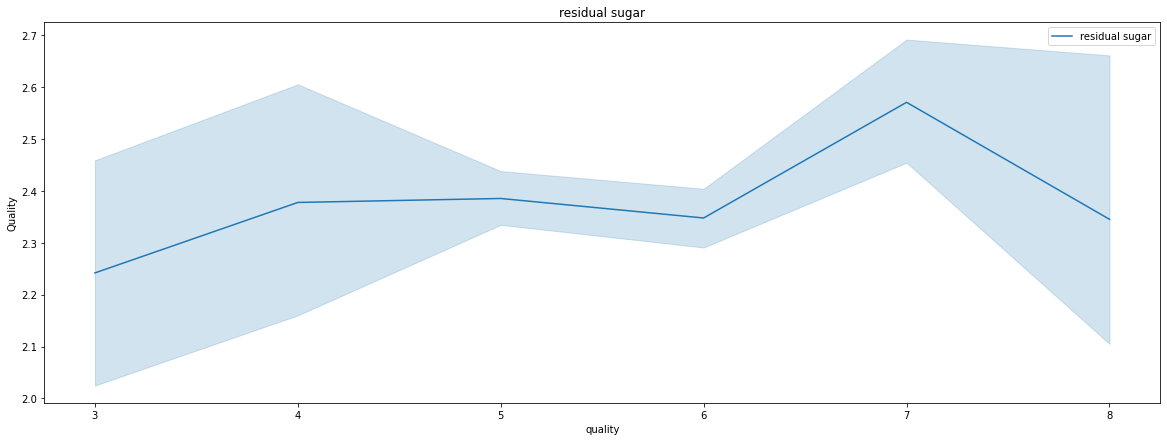

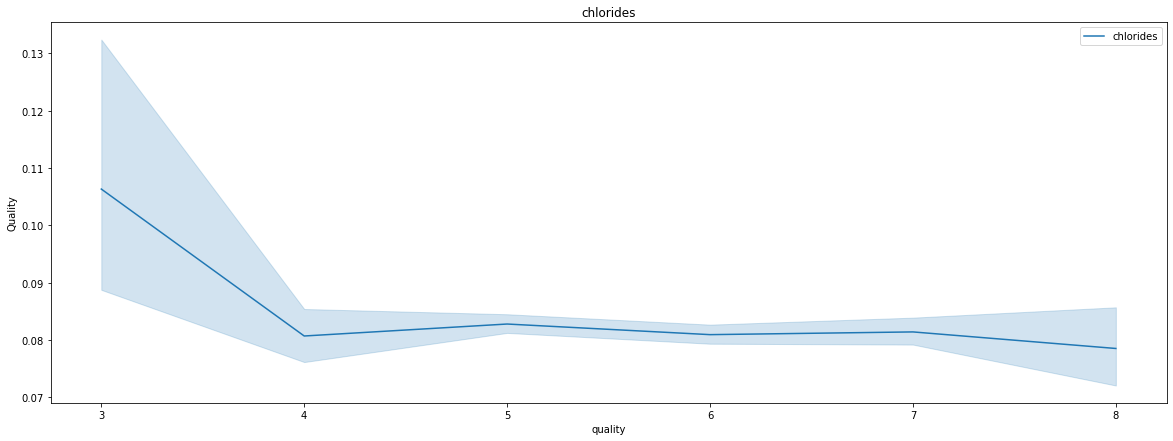

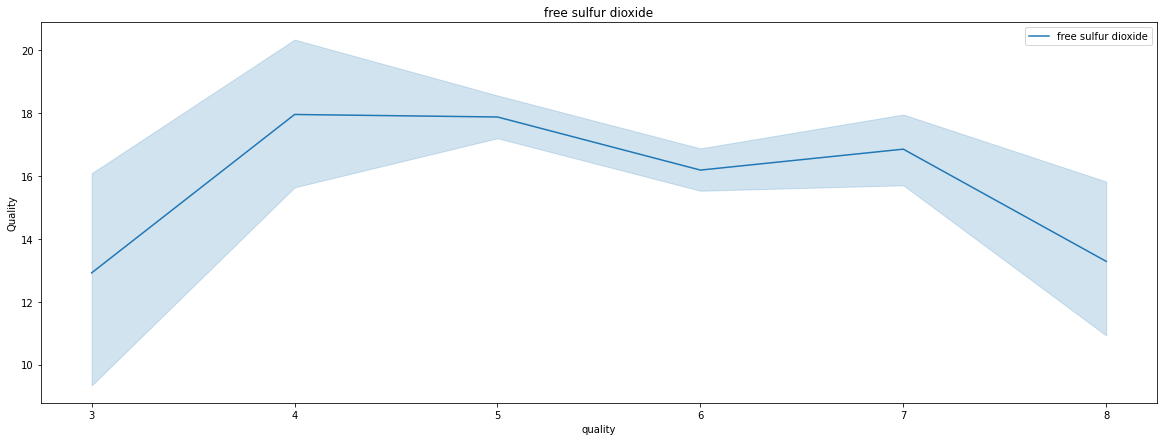

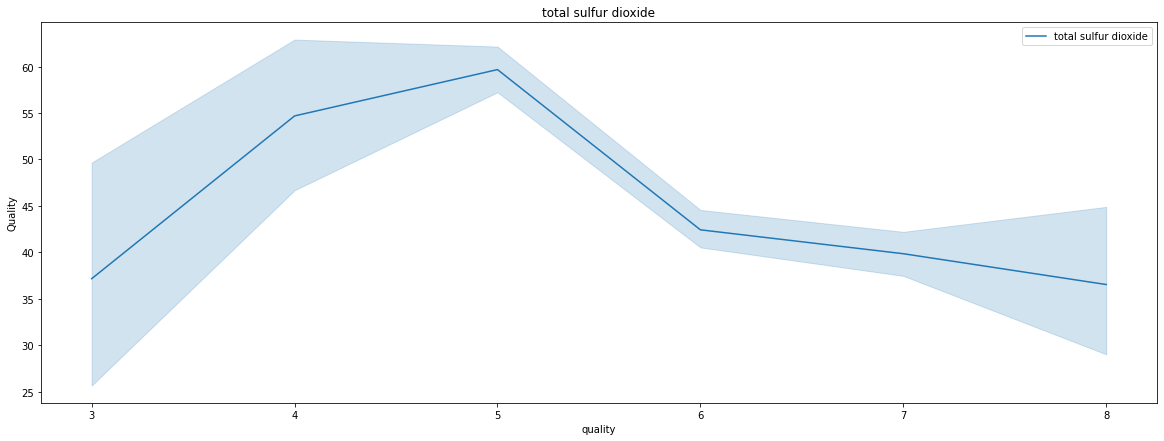

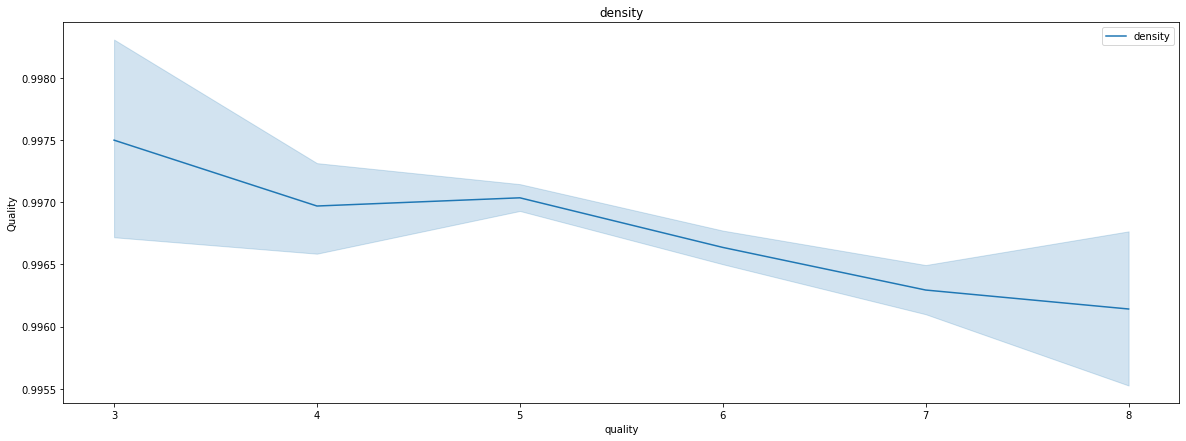

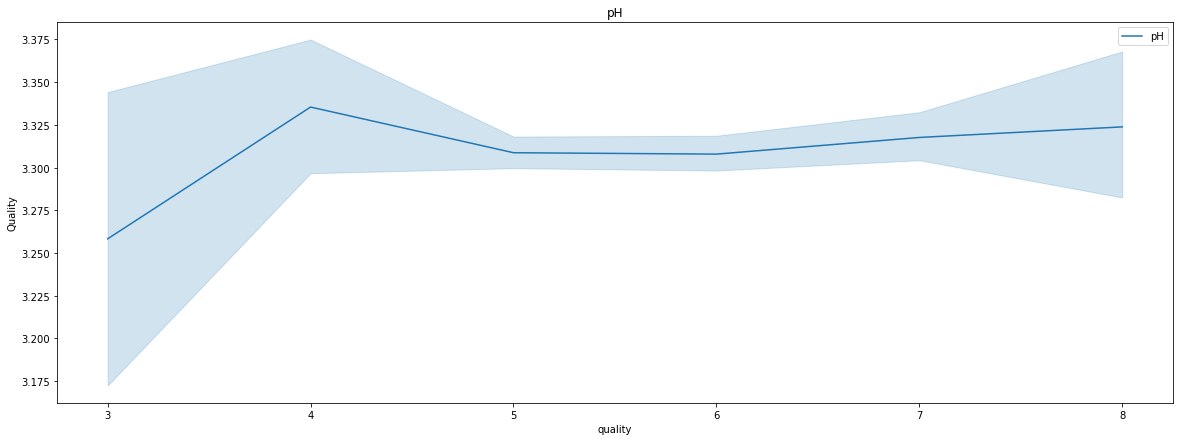

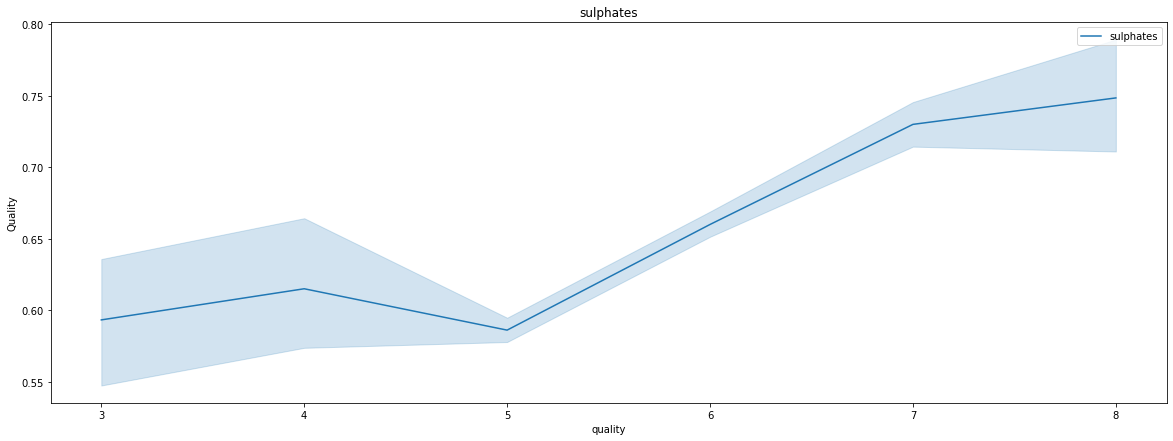

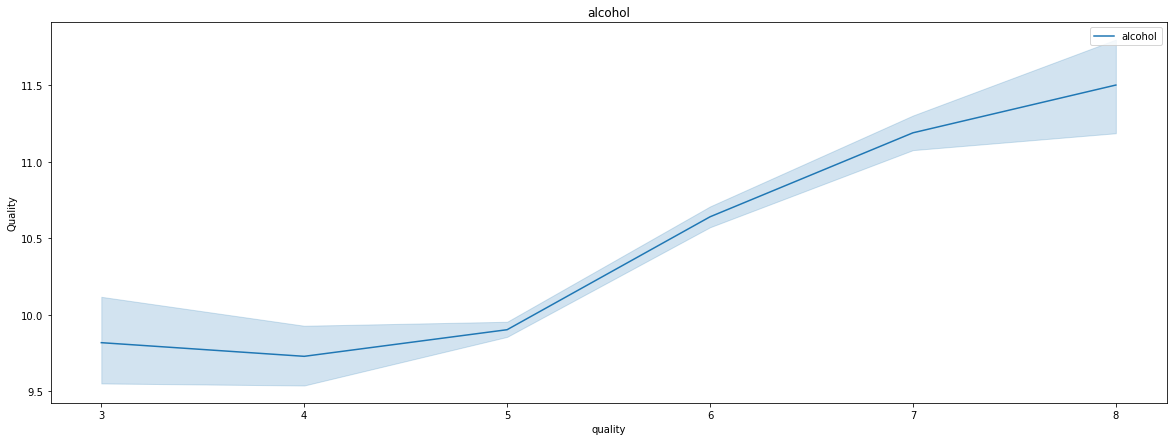

In [255]:
for column in x:
    plt.figure(figsize=(20,7))
    sns.lineplot(data=dftrain, x="quality",y=column,label=column)
    plt.ylabel("Quality")
    plt.title(column)
    plt.legend()
    plt.show()

# Scatter Plot

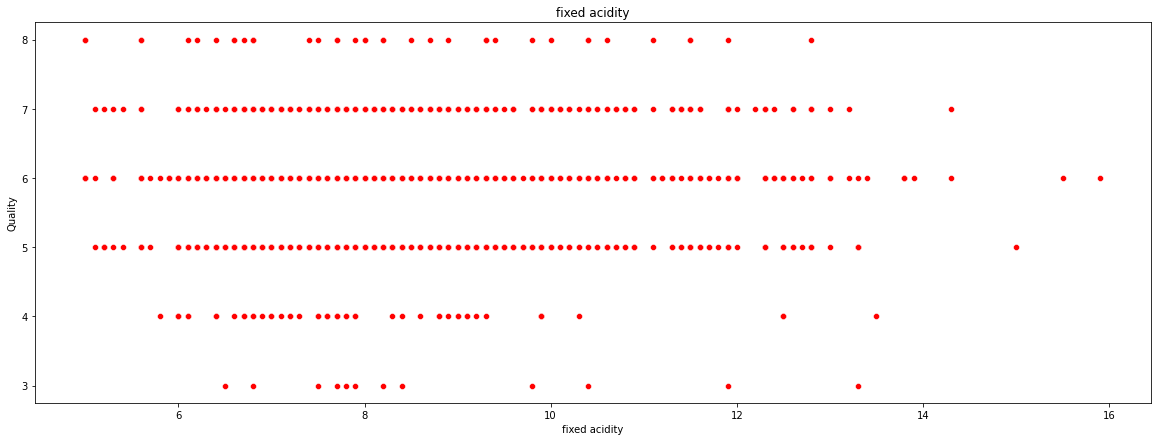

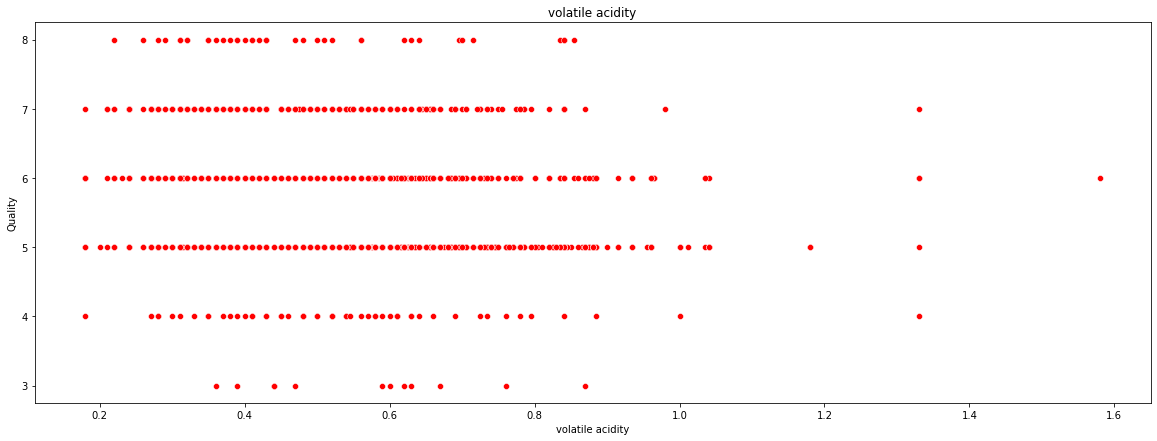

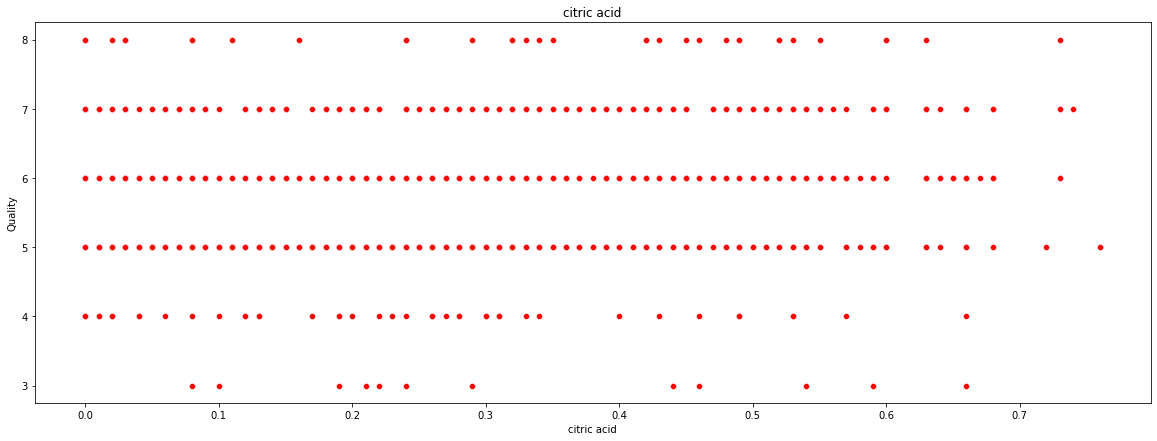

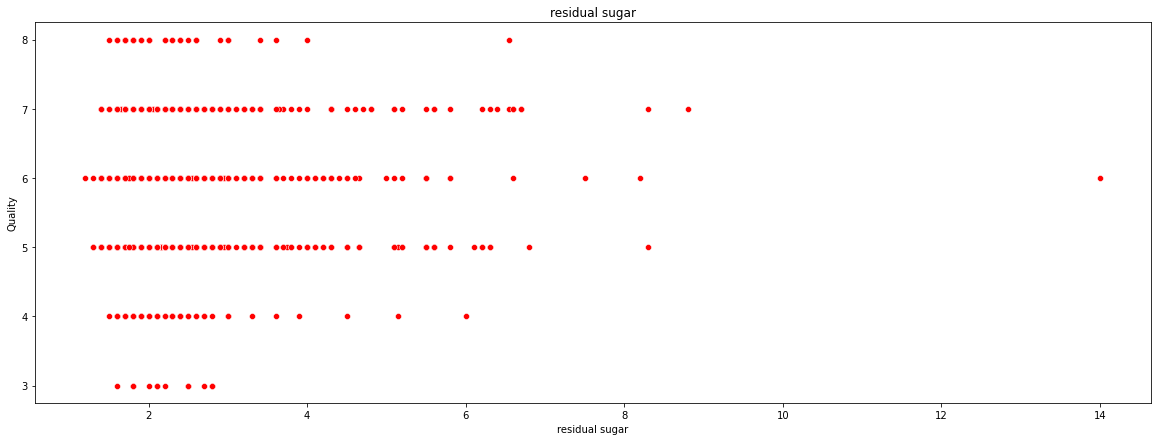

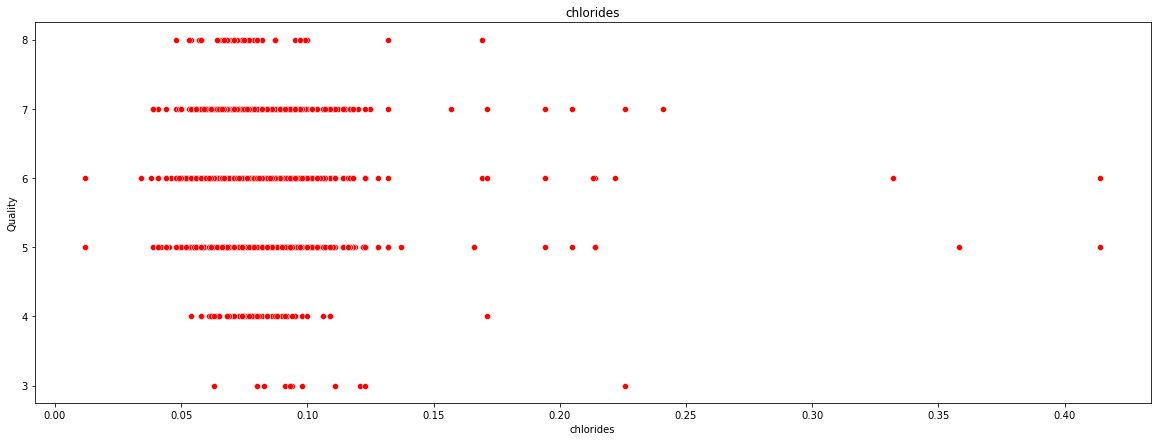

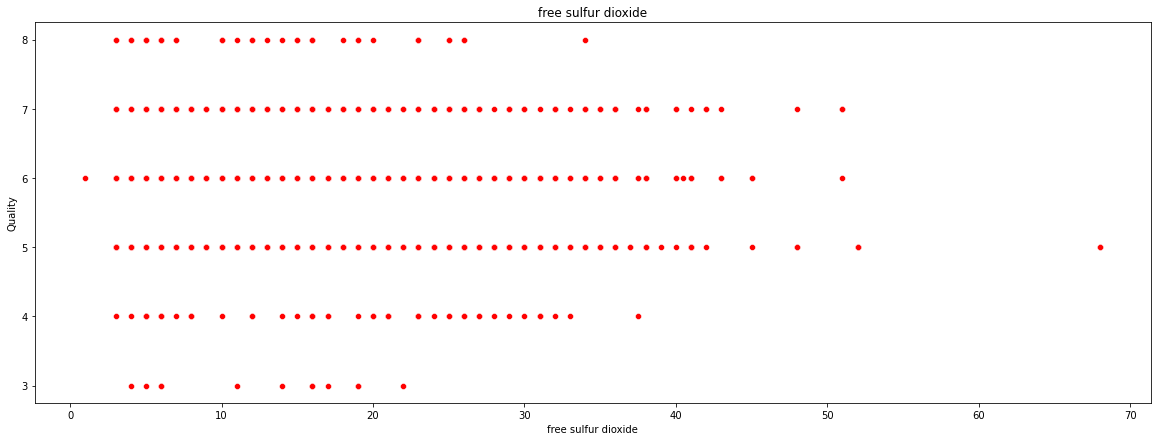

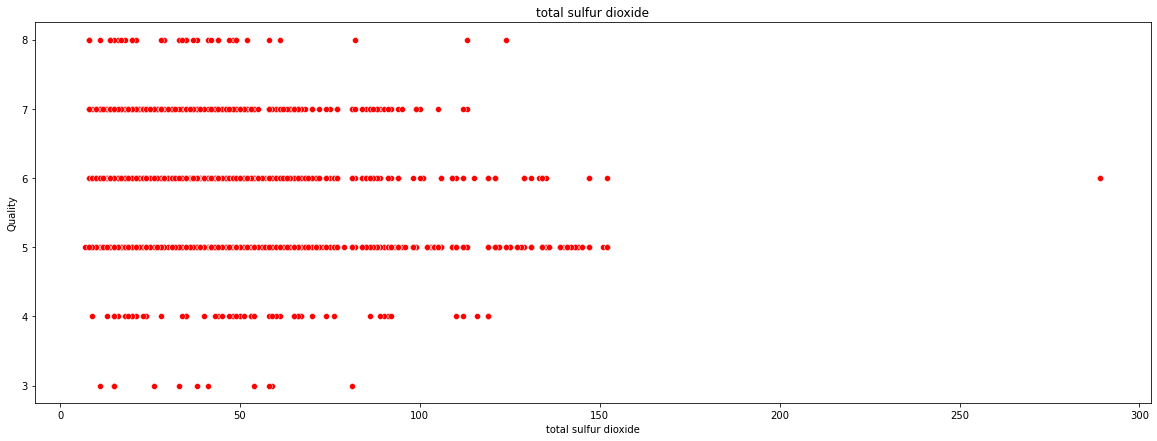

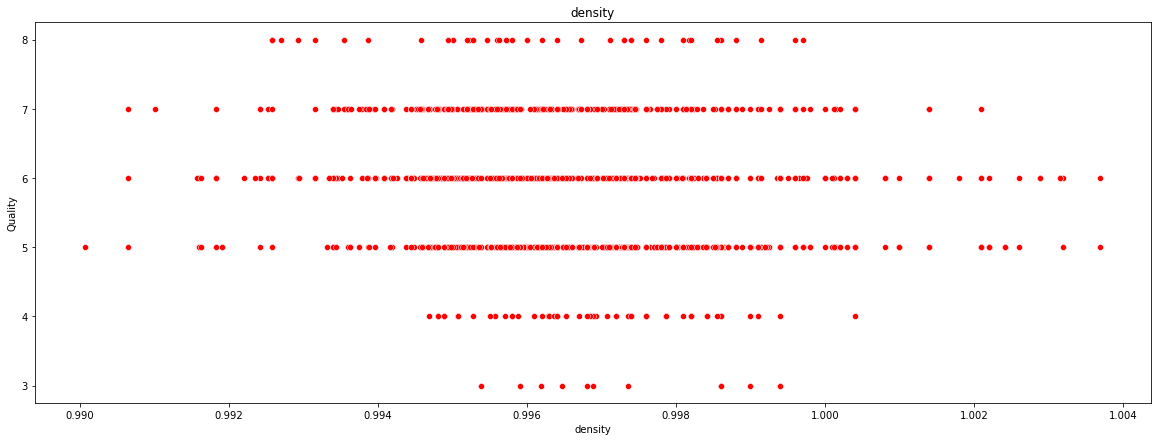

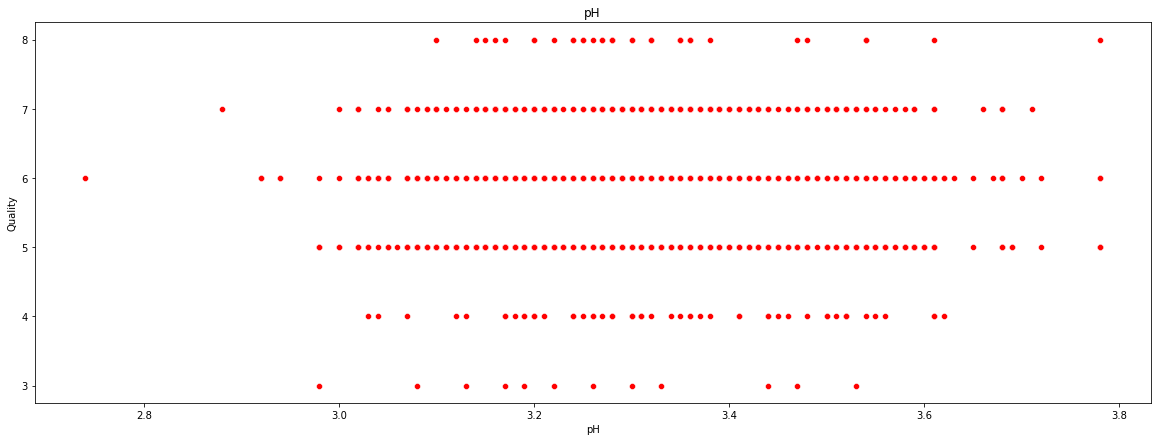

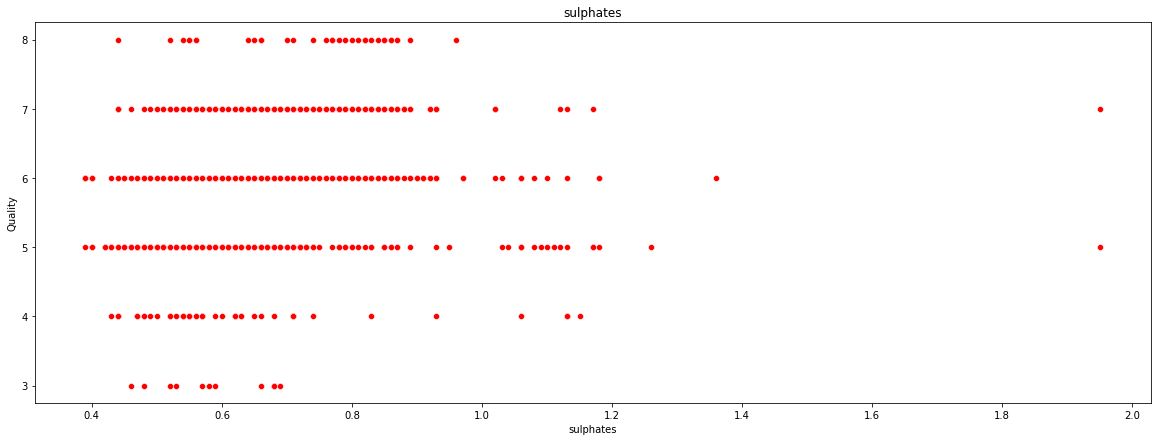

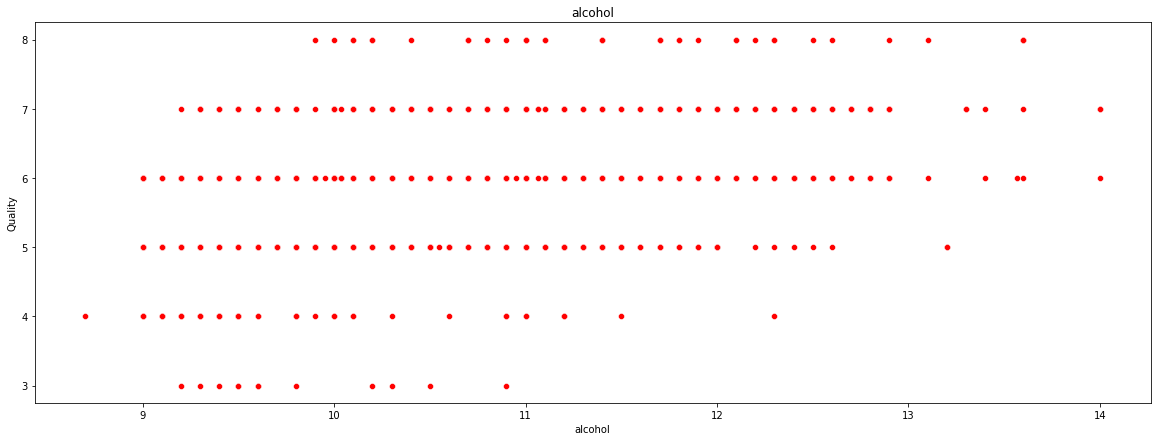

In [266]:
for column in x:
    plt.figure(figsize=(20,7))
    sns.scatterplot(data=dftrain, x=dftrain[column],y="quality",color="r")
    plt.xlabel(column)
    plt.ylabel("Quality")
    plt.title(column)
    plt.show()

# Violin Plot

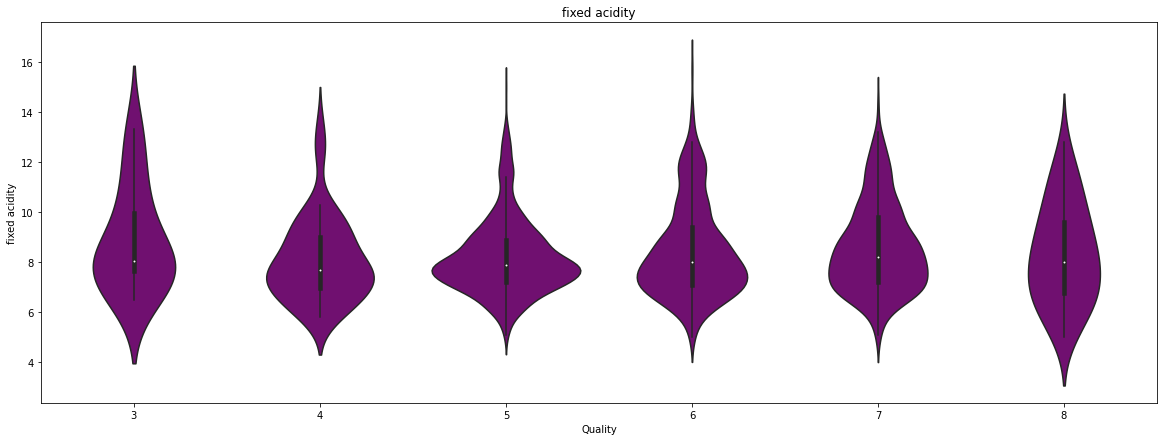

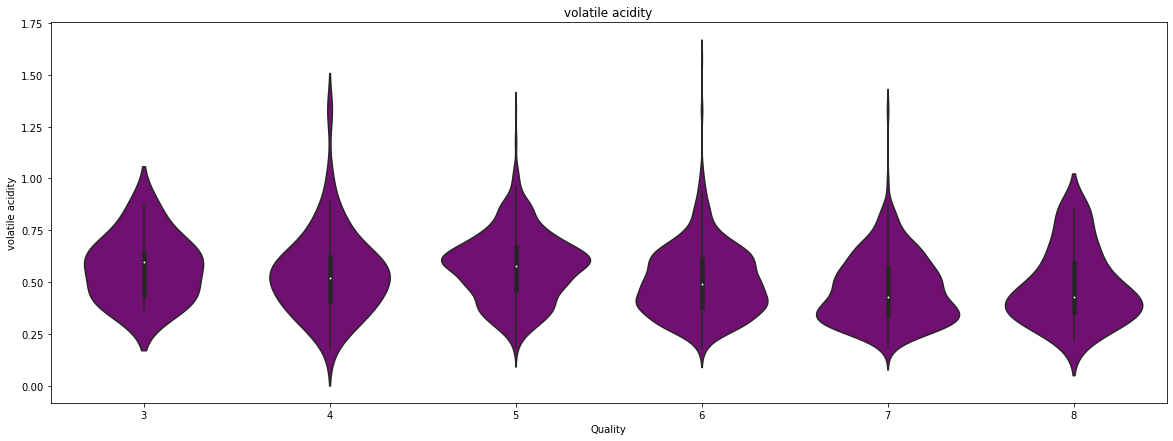

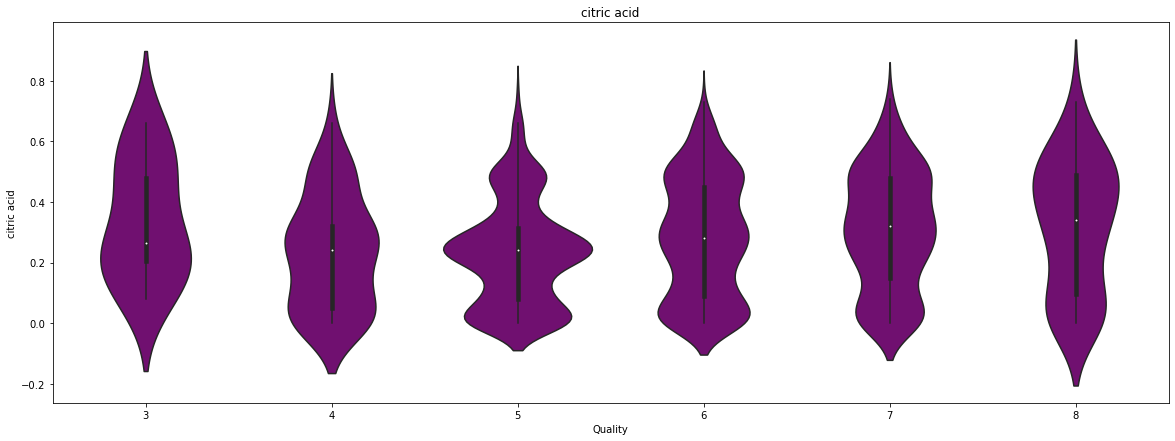

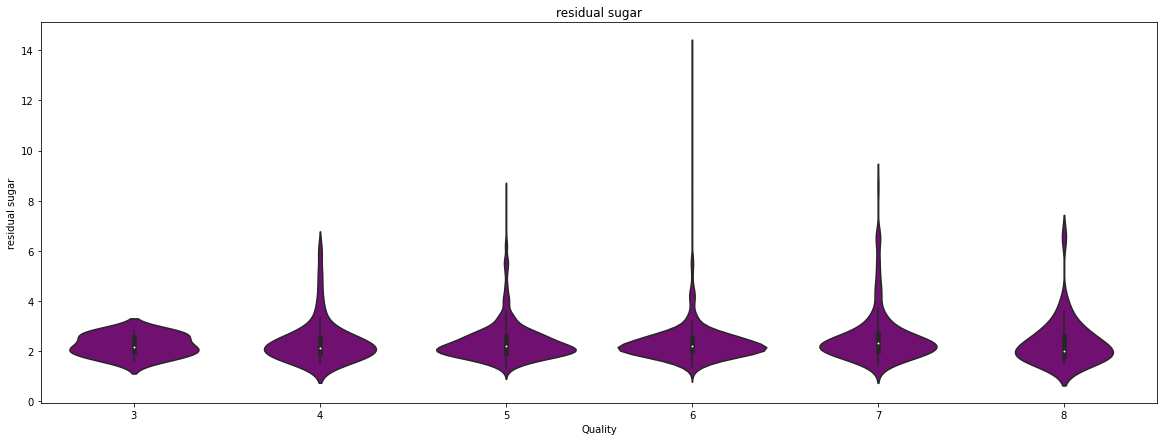

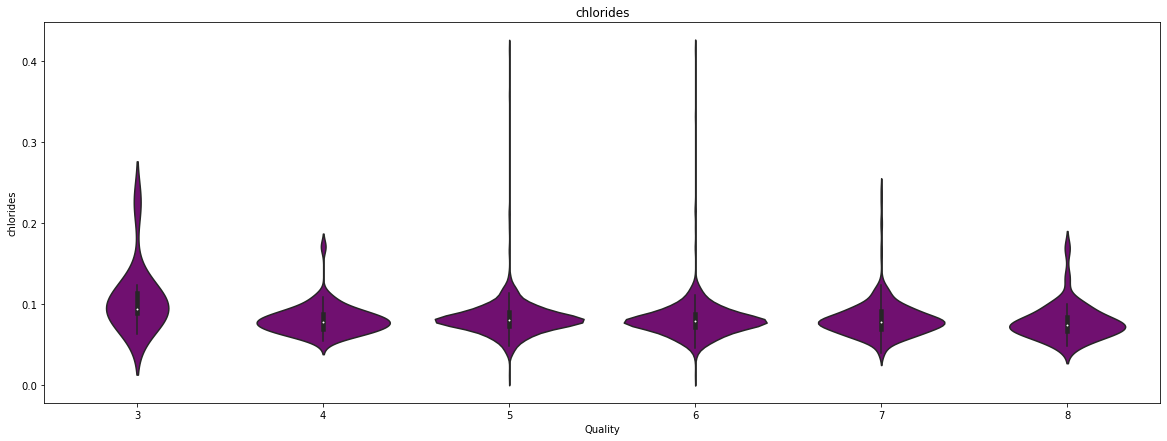

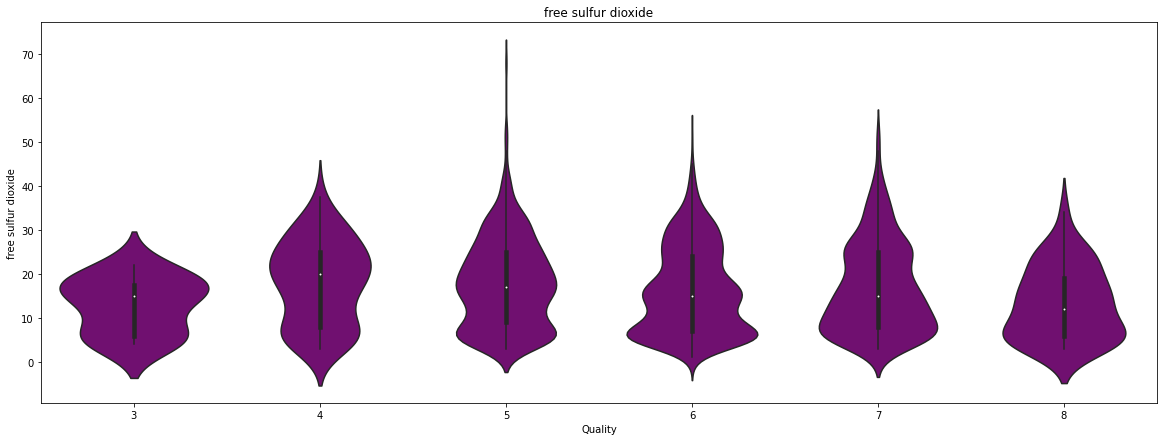

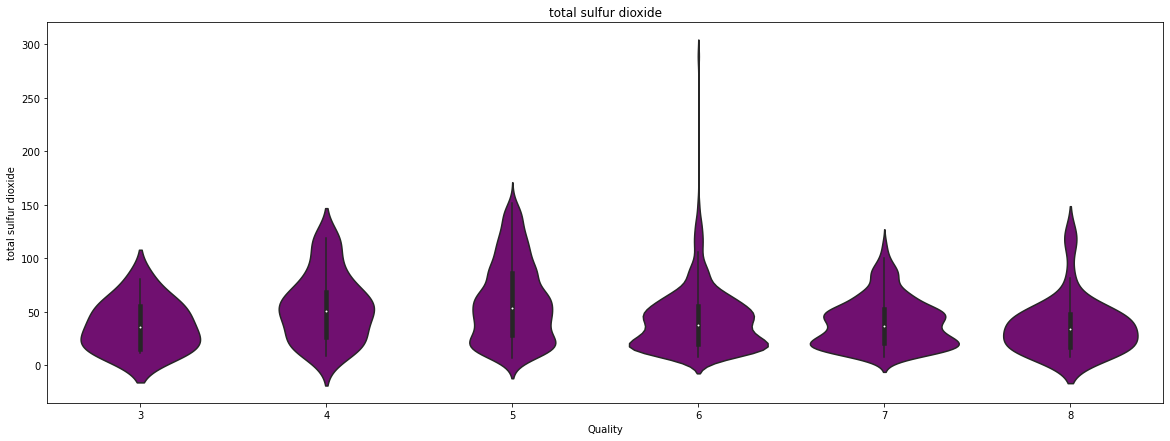

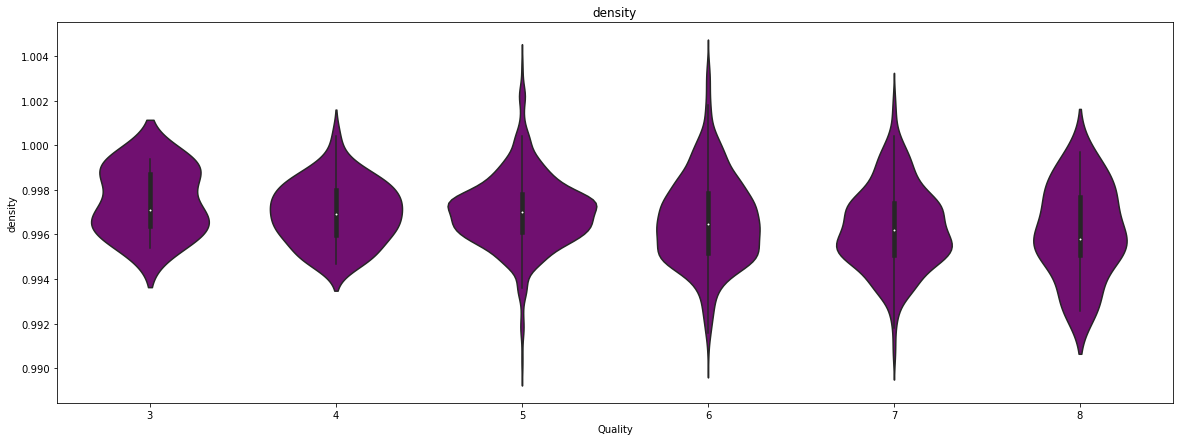

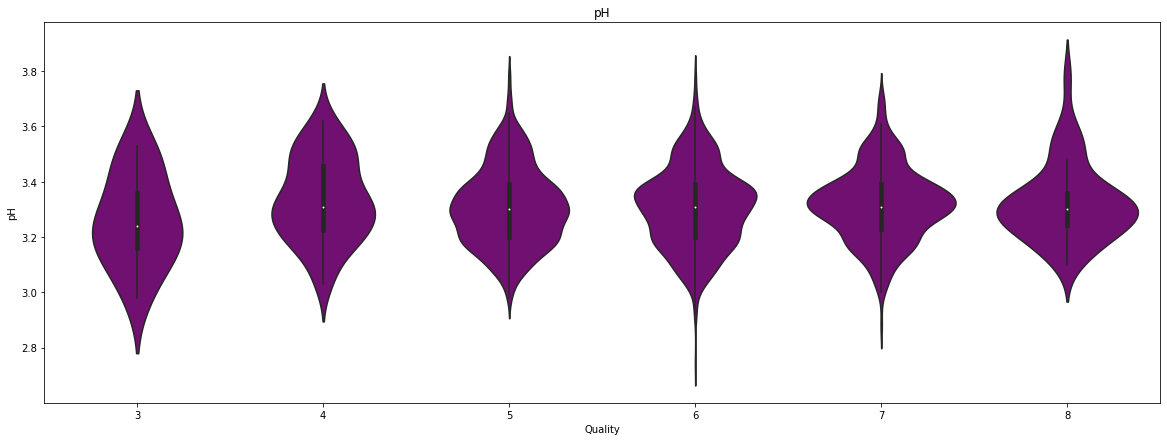

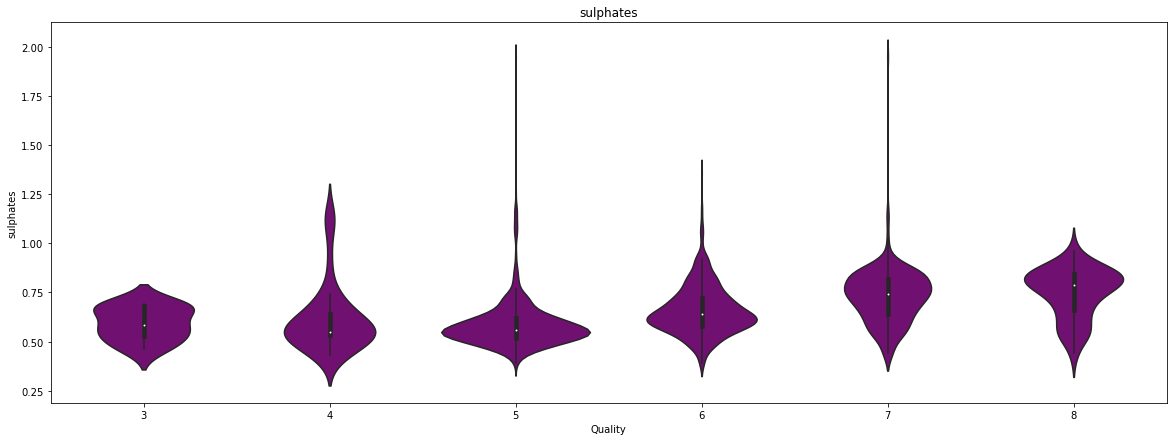

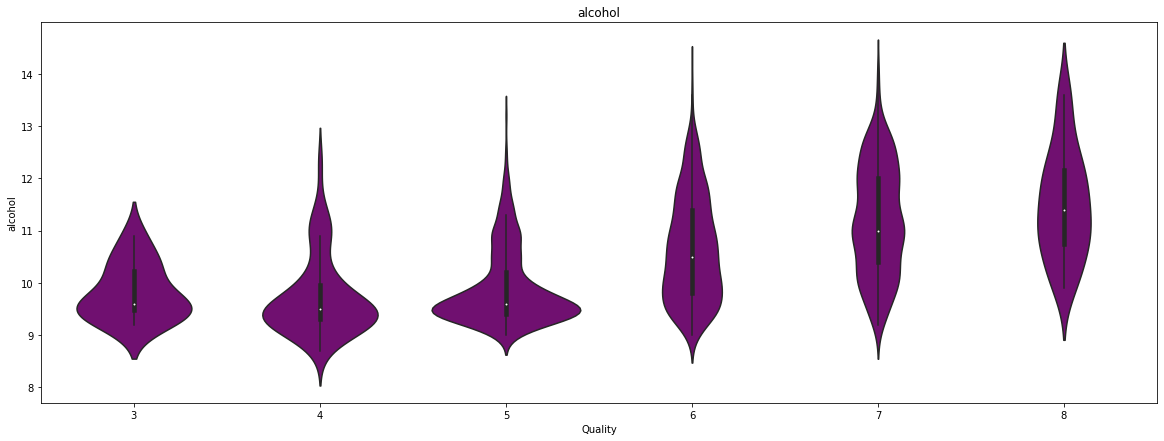

In [268]:
for column in x:
    plt.figure(figsize=(20,7))
    sns.violinplot(data=dftrain, x="quality",y=column,color="purple")
    plt.ylabel(column)
    plt.xlabel("Quality")
    plt.title(column)
    plt.show()

# Swarm Plot

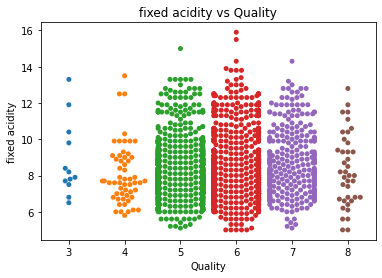

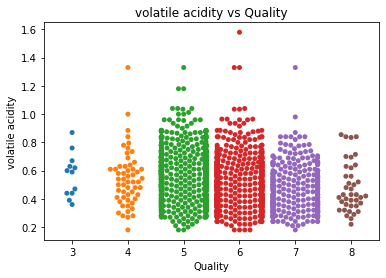

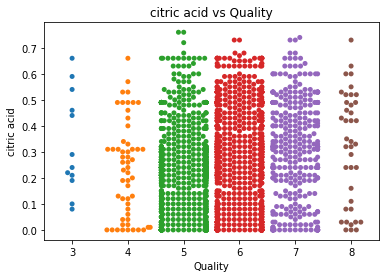

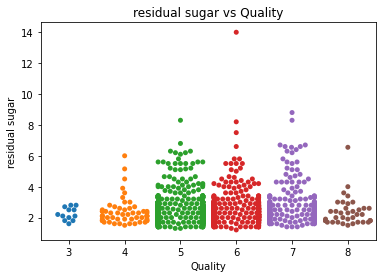

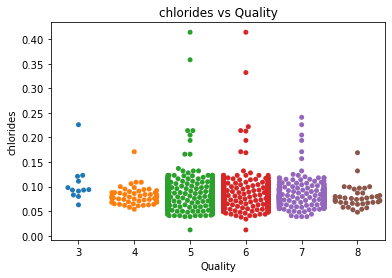

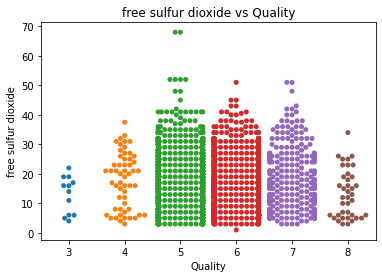

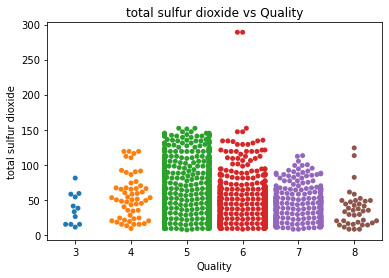

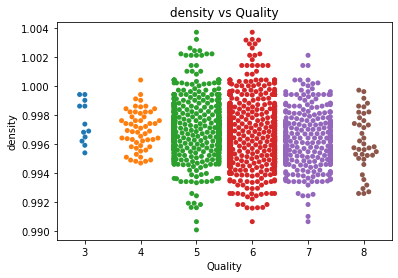

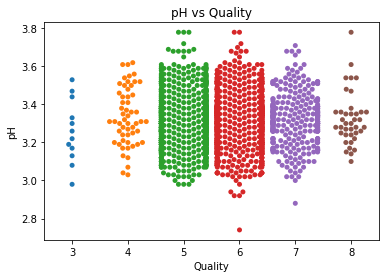

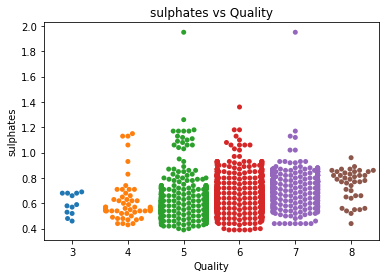

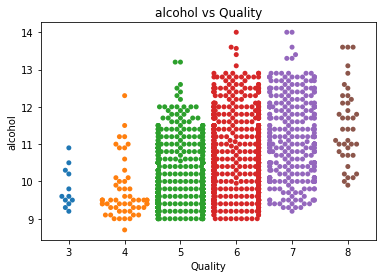

In [269]:
for column in x:
    sns.swarmplot(x='quality', y=column, data=dftrain)
    plt.xlabel('Quality')
    plt.ylabel(column)
    plt.title(f'{column} vs Quality')
    plt.show()

<AxesSubplot:>

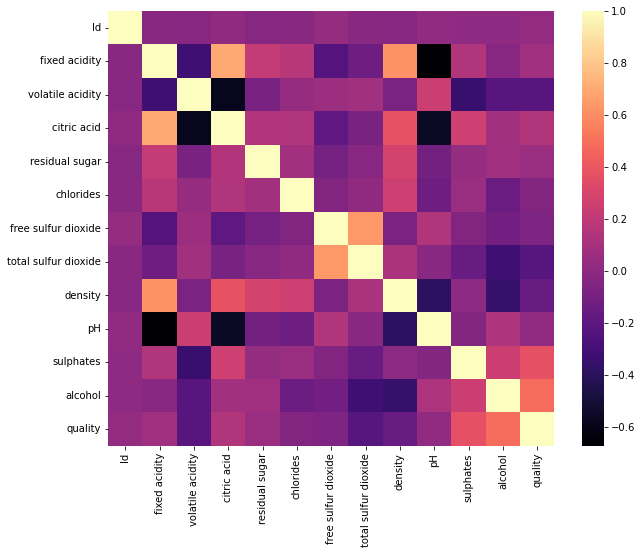

In [225]:
corr = dftrain.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,cmap='magma')

In [226]:
x = dftrain[['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = dftrain['quality']

In [227]:
for column in columns:
    print(dftrain[column].unique)
    print('-------------------------------------------------------')

<bound method Series.unique of 0       8.0
1       9.3
2       7.1
3       8.1
4       8.5
       ... 
2051    6.6
2052    9.7
2053    7.7
2054    9.1
2055    6.2
Name: fixed acidity, Length: 2056, dtype: float64>
-------------------------------------------------------
<bound method Series.unique of 0       0.50
1       0.30
2       0.51
3       0.87
4       0.36
        ... 
2051    0.31
2052    0.59
2053    0.43
2054    0.50
2055    0.31
Name: volatile acidity, Length: 2056, dtype: float64>
-------------------------------------------------------
<bound method Series.unique of 0       0.39
1       0.73
2       0.03
3       0.22
4       0.30
        ... 
2051    0.13
2052    0.21
2053    0.42
2054    0.00
2055    0.18
Name: citric acid, Length: 2056, dtype: float64>
-------------------------------------------------------
<bound method Series.unique of 0       2.20
1       2.30
2       2.10
3       2.60
4       2.30
        ... 
2051    2.00
2052    1.80
2053    1.70
2054    1.75
2055  

In [228]:
print(dftrain['quality'].value_counts())

5    839
6    778
7    333
4     55
8     39
3     12
Name: quality, dtype: int64


<AxesSubplot:>

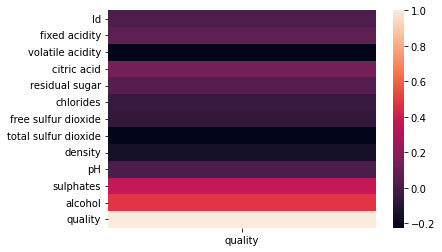

In [229]:
hm = corr[['quality']]
sns.heatmap(hm)

In [230]:
corr['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.482833
sulphates               0.366939
citric acid             0.141797
fixed acidity           0.073852
residual sugar          0.048156
Id                      0.025684
pH                      0.016378
chlorides              -0.046624
free sulfur dioxide    -0.060217
density                -0.153198
volatile acidity       -0.219287
total sulfur dioxide   -0.225670
Name: quality, dtype: float64